Head of the dataset:
    Area  BHK  Bathroom      Furnishing  \
0  800.0    3       2.0  Semi-Furnished   
1  750.0    2       2.0  Semi-Furnished   
2  950.0    2       2.0       Furnished   
3  600.0    2       2.0  Semi-Furnished   
4  650.0    2       2.0  Semi-Furnished   

                                            Locality  Parking     Price  \
0                                   Rohini Sector 25      1.0   6500000   
1             J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                   Rohini Sector 24      1.0   4200000   
4  Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   

          Status   Transaction           Type  Per_Sqft  
0  Ready_to_move  New_Property  Builder_Floor       NaN  
1  Ready_to_move  New_Property      Apartment    6667.0  
2  Ready_to_move        Resale      Apartment    6667.0  
3  Ready_to_move        Resale  Build

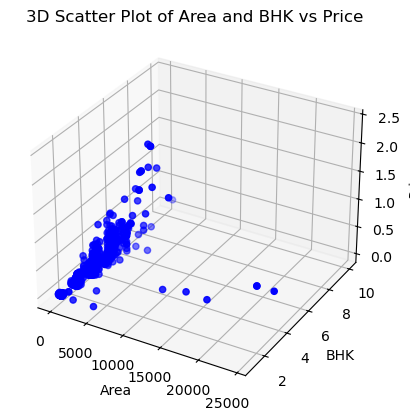

/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

Co-eff of the hyperplane:
 [6.10434405e+03 1.09112208e+07]
Intercept of the hyperplane
 -18047167.722207986
Mean Squared Error (MSE): 206748822856445.66
Mean Absolute Error (MAE): 10338503.435916116
R2 Score of linear regression: 0.5737902953254839


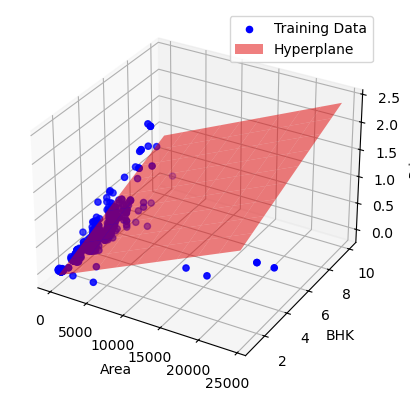

Mean Squared Error (MSE): 206751562591004.88
Mean Absolute Error (MAE): 10338501.662066026
R2 Score: 0.5737846474023602
Coefficients: [ 9567600.62912151 10409043.57322212]
Intercept: 21419599.18741334


/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

df = pd.read_csv("Housing.csv")


print("Head of the dataset:")
print(df.head())


print("\nInfo about the dataset:")
print(df.info())

X = df[['Area', 'BHK']]
Y = df['Price']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting 'Area' and 'BHK' from X
X_area = X['Area']
X_bhk = X['BHK']

# Plotting the 3D scatter plot
ax.scatter(X_area, X_bhk, Y, c='b', marker='o')

# Set labels and title
ax.set_xlabel('Area')
ax.set_ylabel('BHK')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Area and BHK vs Price')

plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict((X_test))



print("Co-eff of the hyperplane:\n",lr.coef_)
print("Intercept of the hyperplane\n",lr.intercept_)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2 = r2_score(Y_test, y_pred)
print("R2 Score of linear regression:", r2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the training data points
ax.scatter(X_train['Area'], X_train['BHK'], Y_train, c='b', marker='o', label='Training Data')

# Create a meshgrid for the hyperplane
x1_range = np.linspace(min(X_train['Area']), max(X_train['Area']), 10)
x2_range = np.linspace(min(X_train['BHK']), max(X_train['BHK']), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
hyperplane = lr.intercept_ + lr.coef_[0] * x1_mesh + lr.coef_[1] * x2_mesh

# Plot the hyperplane
ax.plot_surface(x1_mesh, x2_mesh, hyperplane, alpha=0.5, color='r', label='Hyperplane')

# Set labels and legend
ax.set_xlabel('Area')
ax.set_ylabel('BHK')
ax.set_zlabel('Price')
ax.legend()

# Show the plot
plt.show()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

# Train the Ridge Regression model
alpha = 0.1  # Regularization strength
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, Y_train)

# Predict the target variable values
y_pred = ridge.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

# Print the coefficients of the model
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)